## Substance objects

Substance objects are the heart of ReactorD library. Each reagent, product and 
inert of the reactive systems must be individually represented by a Substance 
object.

For this tutorial, import ReactorD, numpy and matplotlib.pyplot

In [10]:
import matplotlib.pyplot as plt

import numpy as np

import reactord as rd

### Substance objects instantiation

A fully defined Substance contains a lot of information that may not be 
available or may not be necessary for the reactive system that will be 
simulated. The minimum necessary information for each substance will be 
specified on each mixture and each reactor. The complete signature for the 
Substance objects is:

```python
rd.Substance(  
    name: str = None,  
    molecular_weight: float = None,  
    normal_boiling_point: float = None,  
    normal_melting_point: float = None,  
    critical_temperature: float = None,  
    critical_pressure: float = None,  
    acentric_factor: float = None,  
    formation_enthalpy: float = None,  
    formation_enthalpy_ig: float = None,  
    formation_gibbs: float = None,  
    formation_gibbs_ig: float = None,  
    vaporization_enthalpy_t: Callable = None,  
    sublimation_enthalpy_t: Callable = None,  
    volume_solid_t: Callable = None,  
    volume_liquid_tp: Callable = None,  
    volume_gas_tp: Callable = None,  
    heat_capacity_solid_t: Callable = None,  
    heat_capacity_liquid_t: Callable = None,  
    heat_capacity_gas_t: Callable = None,  
    thermal_conductivity_liquid_tp: Callable = None,  
    thermal_conductivity_gas_tp: Callable = None,  
    viscosity_liquid_tp: Callable = None,  
    viscosity_gas_tp: Callable = None,  
)
```
The Substance arguments may be classified in two grups:  
* Constant properties:  
    - name  
    - molecular_weight  
    - normal_boiling_point  
    - normal_melting_point  
    - critical_temperature  
    - critical_pressure  
    - acentric_factor  
    - formation_enthalpy  
    - formation_enthalpy_ig  
    - formation_gibbs  
    - formation_gibbs_ig    
* Temperature and pressure dependent properties:  
    - vaporization_enthalpy_t  
    - sublimation_enthalpy_t  
    - volume_solid_t  
    - volume_liquid_tp  
    - volume_gas_tp  
    - heat_capacity_solid_t  
    - heat_capacity_liquid_t  
    - heat_capacity_gas_t  
    - thermal_conductivity_liquid_tp  
    - thermal_conductivity_gas_tp  
    - viscosity_liquid_tp  
    - viscosity_gas_tp  

The **Temperature and pressure dependent properties** must be specified as 
python functions of temperature, or both temperature and pressure, as 
corresponds. For this tutorial, a water Substance object is defined with some 
example properties.

The data for defining the water is obtained from:

Don W. Green; Robert H. Perry. Perry's Chemical Engineers' Handbook, Eighth 
Edition (McGraw-Hill: New York, Chicago, San Francisco, Lisbon, London, Madrid,
 Mexico City, Milan, New Delhi, San Juan, Seoul, Singapore, Sydney, Toronto, 
 2008, 1997, 1984, 1973, 1963, 1950, 1941, 1934).

In [11]:
# Defining functions for molar liquid volume and liquid heat capacity.


def water_volume_liquid_tp(temperature: float, pressure: float) -> float:
    """User defined function for liquid molar volume. [m^3/mol]

    Even if pressure is not used in the molar volume function it must be
    specified as an argument.

    The termination of the Substance argument is a visual help to remember the
    arguments needed.

    xxx_t: function(temperature)

    xxx_tp: function(temperature, pressure)

    Parameters
    ----------
    temperature : float
        Temperature [K]
    pressure : float
        Pressure [Pa]

    Returns
    -------
    float
        Molar volume of the mixture [m^3/mol]
    """
    c1 = -13.851
    c2 = 0.64038
    c3 = -0.00191
    c4 = 1.8211e-06

    t = temperature
    molar_vol = 1 / (c1 + c2 * t + c3 * t**2 + c4 * t**3) / 1000

    return molar_vol


def water_heat_capacity_liquid_t(temperature: float, pressure: float) -> float:
    """User defined function for liquid heat capacity. [J/mol/K]

    Parameters
    ----------
    temperature : float
        Temperature [K]

    Returns
    -------
    float
        Liquid heat capacity [J/mol/K]
    """
    c1 = 276370
    c2 = -2090.1
    c3 = 8.125
    c4 = -0.014116
    c5 = 9.3701e-06

    cp_liquid = (
        c1
        + c2 * temperature
        + c3 * temperature**2
        + c4 * temperature**3
        + c5 * temperature**4
    )
    return cp_liquid / 1000

In [12]:
# Defining water Substance by hand

water_byhand = rd.Substance(
    name="water",
    molecular_weight=18.015,
    volume_liquid=water_volume_liquid_tp,
    heat_capacity_liquid=water_heat_capacity_liquid_t,
)

# Calling substance methods

print(water_byhand.molecular_weight)
print(water_byhand.volume_liquid(298.15, 101325))
print(water_byhand.heat_capacity_liquid(298.15, 101325))

18.015
1.7999364032438635e-05
75.38420366723898


For convinence the object subject create by hand could be save into a file for its posterior use

In [13]:
# The object is save
Water = rd.Substance.create_substance_file(water_byhand, "water_file")

# The substance object is called
water_from_pickle = rd.Substance.from_pickle("water_file")

Water = rd.Substance.load_file("water_file")

1.7999364032438635e-05


### Alternative Substance constructor

For convenience an alternative Substance constructor is provided:

```python
substance_object = rd.Substance.from_thermo_database(identification)
```

Where identification is a string that may be either the name or the CAS number 
of the substance. This alternative method uses the Caleb's Thermo library:

Caleb Bell and Contributors (2016-2021). Thermo: Chemical properties component 
of Chemical Engineering Design Library (ChEDL) 
https://github.com/CalebBell/thermo.



In [14]:
water_thermo = rd.Substance.from_thermo_database("water")

print(water_thermo.molecular_weight)
print(water_thermo.volume_liquid(298.15, 101325))
print(water_thermo.heat_capacity_liquid(298.15, 101325))

18.01528
1.8069338439592966e-05
75.31465144297992


Text(0.5, 0, 'Temperature [K]')

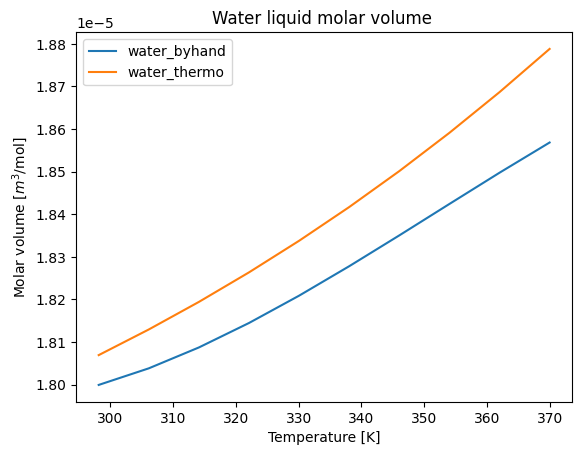

In [15]:
# Comparisson

temperature = np.linspace(298.15, 370, 10)

water_vol_byhand = water_byhand.volume_liquid(temperature, 101325)
water_vol_thermo = water_thermo.volume_liquid(temperature, 101325)

plt.plot(temperature, water_vol_byhand)
plt.plot(temperature, water_vol_thermo)

plt.title("Water liquid molar volume ")
plt.legend(["water_byhand", "water_thermo"])
plt.ylabel(r"Molar volume [$m^{3}$/mol]")
plt.xlabel("Temperature [K]")

Finally a list of all the attributes and methods that Substance objects may 
have.

NOTE THAT FOR SOME SUBSTANCE SOME DATA MAY NOT BE AVAILABLE

In [16]:
print(
    f"name: {water_thermo.name} \n"
    f"molecular weight: {water_thermo.molecular_weight} g/mol \n"
    f"normal boiling point: {water_thermo.normal_boiling_point} K \n"
    f"normal melting point: {water_thermo.normal_melting_point} K \n"
    f"critical temperature: {water_thermo.critical_temperature} K \n"
    f"critical pressure: {water_thermo.critical_pressure} Pa \n"
    f"acentric factor: {water_thermo.acentric_factor} \n"
    f"formation enthalpy: {water_thermo.formation_enthalpy} J/mol \n"
    f"formation enthalpy ideal gas: {water_thermo.formation_enthalpy_ig} J/mol"
    "\n"
    f"formation Gibbs energy ideal gas: {water_thermo.formation_enthalpy_ig}"
    " J/mol \n"
    f"vaporization enthalpy: {water_thermo.vaporization_enthalpy(373.15)}"
    " J/mol \n"
    f"sublimation enthalpy: {water_thermo.sublimation_enthalpy(273.15)} J/mol"
    "\n"
    f"fusion enthalpy: {water_thermo.fusion_enthalpy(298.15)} J/mol \n"
    f"volume solid: {water_thermo.volume_solid(273.15, 101325)} m^3/mol \n"
    f"volume liquid: {water_thermo.volume_liquid(298.15, 101325)} m^3/mol \n"
    f"volume gas: {water_thermo.volume_gas(373.15, 101325)} m^3/mol \n"
    f"heat capacity solid: {water_thermo.heat_capacity_solid(373.15, 101325)} "
    "J/K/mol \n"
    f"heat capacity liquid: {water_thermo.heat_capacity_liquid(373, 101325)}"
    " J/K/mol \n"
    f"heat capacity gas: {water_thermo.heat_capacity_gas(373.15, 101325)} "
    "J/K/mol \n"
    "thermal conductivity liquid: "
    f"{water_thermo.thermal_conductivity_liquid(298.15, 101325)}"
    " W/m/K \n"
    "thermal conductivity gas: "
    f"{water_thermo.thermal_conductivity_gas(373.15, 101325)} W/m/K \n"
    f"viscosity liquid: {water_thermo.viscosity_liquid(298.15, 101325)} Pa/s"
    "\n"
    f"viscosity gas: {water_thermo.viscosity_gas(400, 101325)} Pa/s \n"
    "Heat capacity integral over temperature: \n"
    f"solid: {water_thermo.heat_capacity_solid_dt_integral(250, 280, 101325)} "
    "J/mol "
    f"liq: {water_thermo.heat_capacity_liquid_dt_integral(300, 330, 101325)} "
    "J/mol "
    f"gas: {water_thermo.heat_capacity_gas_dt_integral(380, 410, 101325)} "
    "J/mol"
)

name: water 
molecular weight: 18.01528 g/mol 
normal boiling point: 373.124 K 
normal melting point: 273.15 K 
critical temperature: 647.14 K 
critical pressure: 22048320.0 Pa 
acentric factor: 0.344 
formation enthalpy: -285825.0 J/mol 
formation enthalpy ideal gas: -241822.0 J/mol
formation Gibbs energy ideal gas: -241822.0 J/mol 
vaporization enthalpy: 40798.29512500727 J/mol 
sublimation enthalpy: 50742.6591346729 J/mol
fusion enthalpy: 7127.725817752558 J/mol 
volume solid: 1.5989414456471014e-05 m^3/mol 
volume liquid: 1.8069338439592966e-05 m^3/mol 
volume gas: 0.030619706153110104 m^3/mol 
heat capacity solid: 30.969944935783165 J/K/mol 
heat capacity liquid: 76.05035935651769 J/K/mol 
heat capacity gas: 34.03105522722508 J/K/mol 
thermal conductivity liquid: 0.606299909107096 W/m/K 
thermal conductivity gas: 0.023865413505450152 W/m/K 
viscosity liquid: 0.0009125307951858123 Pa/s
viscosity gas: 1.3587844730035658e-05 Pa/s 
Heat capacity integral over temperature: 
solid: 681.